# 开始使用

本文介绍如何使用 cedarkit 工具栈为 CMA-MESO 数据绘制中国区域 2 米温度填充图。

首先加载需要使用的包，包括：

- 数据结构相关：pandas
- 数据准备工具库：reki
- 绘图工具库：cedarkit.maps
    - 绘图板：`Panel`
    - 底图布局：`EastAsiaMapTemplate`
    - 填充图样式：`ContourStyle`
    - 颜色表：`get_ncl_colormap`
    - 地图包：`set_default_map_package`

In [3]:
import pandas as pd

from reki.data_finder import find_local_file
from reki.format.grib.eccodes import load_field_from_file

from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapTemplate
from cedarkit.maps.colormap import get_ncl_colormap
from cedarkit.maps.map import set_default_map_loader_package

设置绘图的数据参数。绘制 CMA-MESO 2024 年 11 月 14 日 00 时次 024 时效的 2 米温度场。

In [4]:
system_name = "CMA-MESO"
data_type = "cma_meso_3km/grib2/orig"
start_time = pd.to_datetime("2024-11-14 00:00:00")
forecast_time = pd.to_timedelta("24h")

## 加载数据

获取 GRIB2 文件目录

In [5]:
file_path = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
)
file_path

PosixPath('/g3/COMMONDATA/OPER/CEMC/MESO_3KM/Prod-grib/2024111400/ORIG/rmf.hgra.2024111400024.grb2')

加载 2 米温度场。这里直接使用 ecCodes 内置的要素名 `2t`

In [6]:
t_2m_field = load_field_from_file(
    file_path,
    parameter="2t",
) - 273.15
t_2m_field

<xarray.DataArray '2t' (latitude: 1671, longitude: 2501)> Size: 33MB
array([[-19.79798437, -19.87098437, -19.94298437, ..., -20.50598437,
        -19.98698437, -19.95998437],
       [ -6.62598437,  -6.78098437,  -6.38398437, ..., -21.55898437,
        -21.51698437, -20.27398437],
       [ -6.43498437,  -6.69698437,  -5.93298437, ..., -21.05498437,
        -21.48098437, -20.02598437],
       ...,
       [ 27.06201563,  27.07301563,  27.06801563, ...,  27.54301563,
         27.55001563,  27.65901563],
       [ 27.09601563,  27.05101563,  27.06801563, ...,  27.57601563,
         27.57201563,  27.66101563],
       [ 27.04401563,  27.05801563,  27.05101563, ...,  27.54901563,
         27.57201563,  27.66101563]])
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B 1 days
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  int64 8B 2
  * latitude           (latitude) float64 13kB 60.1 60.07 60.04 ... 10.03 10.0
  * longitude          (longitude) float64 20kB 70.0 70.03 70.06 ... 145.0 145.0

## 配置

定义填充图层次

In [7]:
t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]

定义填充图颜色表。色表来自 cedarkit-maps 内置的 NCL 色表文件 BlAqGrYeOrReVi200.rgb。

In [8]:
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)

定义填充图样式

In [9]:
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)

使用 CEMC 地图包

> 注：如果没有安装 cemc-meda-data 包，可以注释改行代码，直接使用默认地图包

In [10]:
set_default_map_loader_package("cedarkit.maps.map.cemc")

'cedarkit.maps.map.cemc'

## 绘图

创建中国区域底图布局

In [11]:
domain = EastAsiaMapTemplate()

创建绘图板，绘制等值线，设置标题，添加颜色条

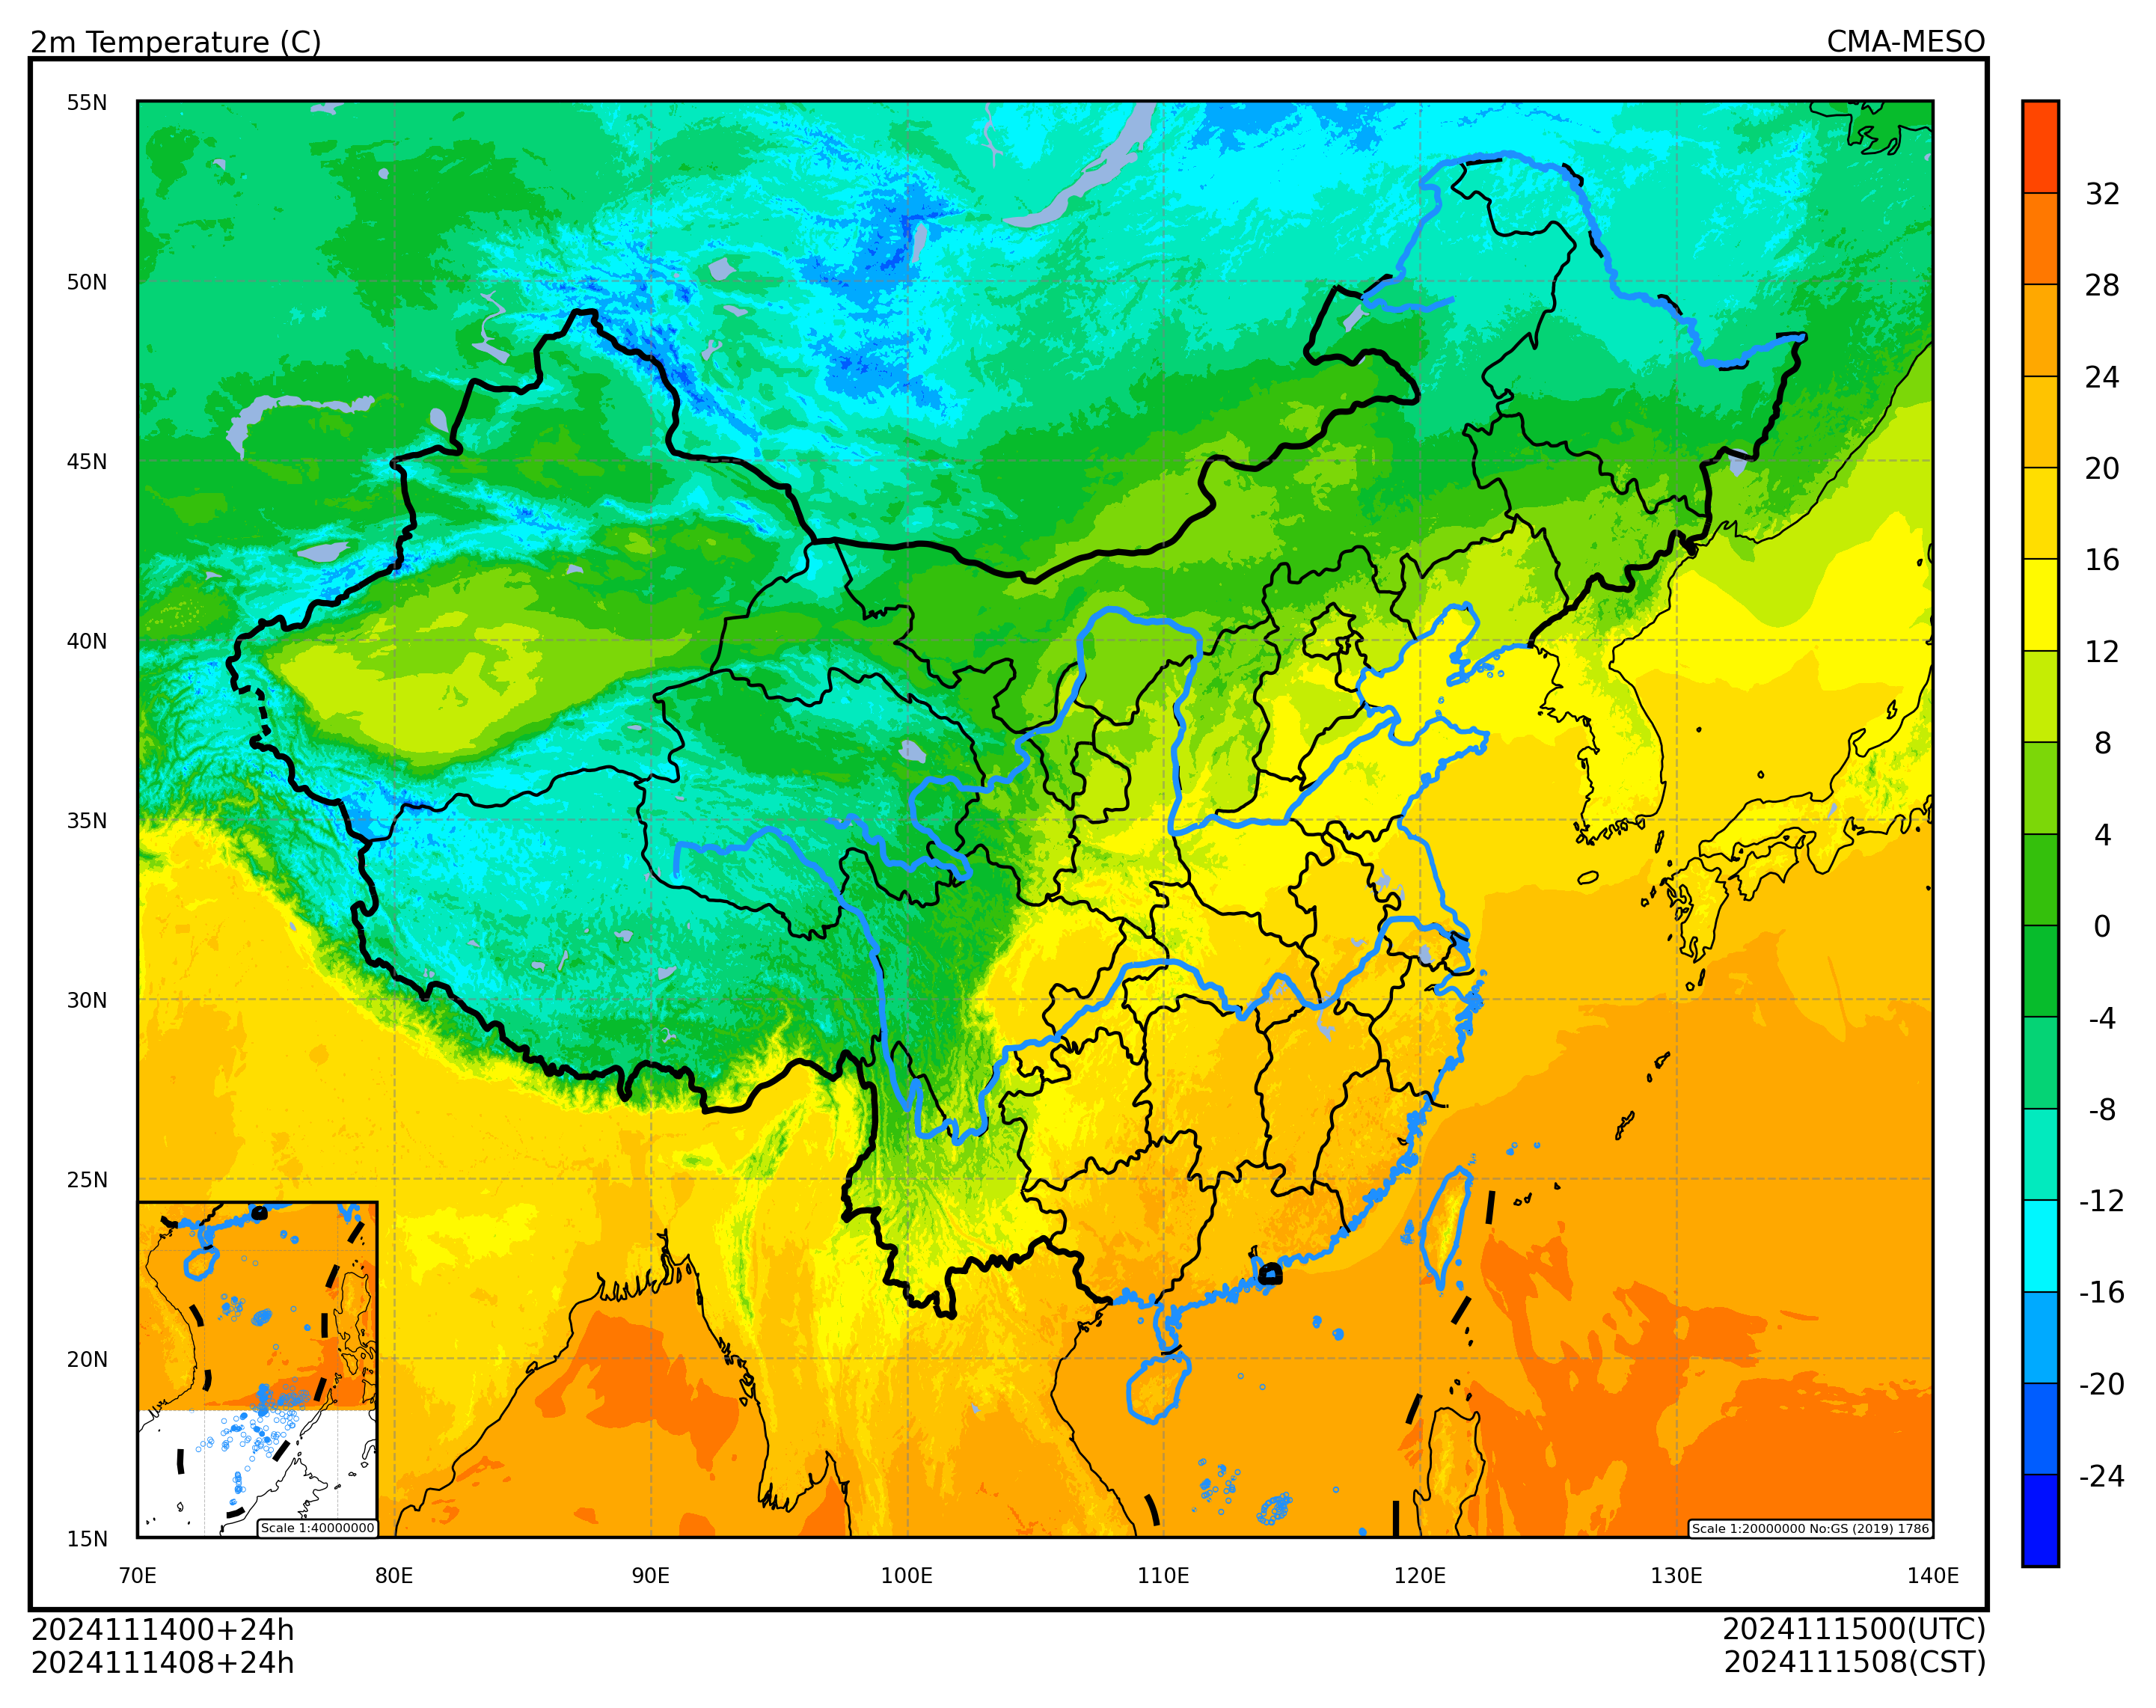

In [12]:
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()